In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

df=pd.read_csv("/Users/shlokrakeshapte/Desktop/task/layoffs_data.csv")

df.head(10)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown
5,Microsoft,Seattle,Other,1000.0,2024-06-03,https://www.theverge.com/2024/6/3/24170902/mic...,1.0,Post-IPO,2024-06-03 20:27:12,United States,NaN,Unknown
6,OrCam,Jerusalem,Healthcare,100.0,2024-06-03,https://www.calcalistech.com/ctechnews/article...,86.0,Unknown,2024-06-04 03:47:34,Israel,0.50,Unknown
7,Google,SF Bay Area,Consumer,100.0,2024-05-31,https://www.businessinsider.com/google-cloud-l...,26.0,Post-IPO,2024-06-01 18:35:17,United States,NaN,Unknown
8,Tropic,New York City,Finance,40.0,2024-05-31,https://www.linkedin.com/feed/update/urn:li:ac...,67.0,Series B,2024-06-01 18:33:50,United States,NaN,Unknown
9,Gro Intelligence,New York City,Food,NaN,2024-05-31,https://agfundernews.com/breaking-ag-insights-...,118.0,Series B,2024-06-03 14:55:46,United States,0.10,Unknown


In [4]:
df.shape

(3642, 12)

In [5]:
df.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1253
Date                             0
Source                           0
Funds_Raised                   390
Stage                            0
Date_Added                       0
Country                          0
Percentage                    1300
List_of_Employees_Laid_Off       0
dtype: int64

In [6]:
s=df["Laid_Off_Count"].fillna(df["Laid_Off_Count"].mean(),inplace=True)

In [7]:
p=df["Funds_Raised"].fillna(df["Funds_Raised"].mean(),inplace=True)

In [8]:
q=df["Percentage"].fillna(df["Percentage"].mean(),inplace=True)

In [9]:
df.isnull().sum()

Company                       0
Location_HQ                   0
Industry                      0
Laid_Off_Count                0
Date                          0
Source                        0
Funds_Raised                  0
Stage                         0
Date_Added                    0
Country                       0
Percentage                    0
List_of_Employees_Laid_Off    0
dtype: int64

In [10]:
df.to_excel('layoff_output.xlsx', index=False)

## Pie Chart for lay offs By Companies

* Highest lay off in industry:- Retail
* Lowest lay off in industry:-A.I 

In [11]:
top_indus=df.head(10)
indus_count=top_indus.value_counts()
fig=px.pie(top_indus,names="Industry",values="Laid_Off_Count")

fig.show()

## Bar Plot for Fund Raised by Top 5 Companies

* Highest value:-Netflix
* Lowest Value:-Tesla

In [12]:
com_count = df.groupby("Company")['Funds_Raised']
top_com = com_count.sum().sort_values(ascending=False).head()
top_com=top_com.reset_index()

print(top_com)

   Company  Funds_Raised
0  Netflix      487600.0
1     Uber      148700.0
2     Meta      104000.0
3   Rivian       78000.0
4    Tesla       60600.0


In [13]:
s=px.bar(top_com,x="Company",y="Funds_Raised")
s.show()

In [14]:
df['StartDate'] = pd.to_datetime(df['Date'])
df['StartDate'].dt.to_period('M')


0       2024-06
1       2024-06
2       2024-06
3       2024-06
4       2024-06
         ...   
3637    2020-03
3638    2020-03
3639    2020-03
3640    2020-03
3641    2020-03
Name: StartDate, Length: 3642, dtype: period[M]

In [15]:
df['month'] = pd.to_datetime(df['StartDate']).dt.month_name()


df

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,StartDate,month
0,Oda,Oslo,Food,150.000000,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,0.281216,Unknown,2024-06-05,June
1,Pagaya,Tel Aviv,Finance,100.000000,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.200000,Unknown,2024-06-05,June
2,Aleph Farms,Tel Aviv,Food,30.000000,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.300000,Unknown,2024-06-05,June
3,MoonPay,Dover,Crypto,30.000000,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.100000,Unknown,2024-06-05,June
4,Yext,New York City,Marketing,257.926329,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.120000,Unknown,2024-06-05,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,257.926329,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.000000,Unknown,2020-03-16,March
3638,HopSkipDrive,Los Angeles,Transportation,8.000000,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.100000,Unknown,2020-03-13,March
3639,Panda Squad,SF Bay Area,Consumer,6.000000,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.750000,Unknown,2020-03-13,March
3640,Tamara Mellon,Los Angeles,Retail,20.000000,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.400000,Unknown,2020-03-12,March


In [16]:
df['Day'] = pd.to_datetime(df['StartDate']).dt.day
df


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,StartDate,month,Day
0,Oda,Oslo,Food,150.000000,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,0.281216,Unknown,2024-06-05,June,5
1,Pagaya,Tel Aviv,Finance,100.000000,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.200000,Unknown,2024-06-05,June,5
2,Aleph Farms,Tel Aviv,Food,30.000000,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.300000,Unknown,2024-06-05,June,5
3,MoonPay,Dover,Crypto,30.000000,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.100000,Unknown,2024-06-05,June,5
4,Yext,New York City,Marketing,257.926329,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.120000,Unknown,2024-06-05,June,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,257.926329,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.000000,Unknown,2020-03-16,March,16
3638,HopSkipDrive,Los Angeles,Transportation,8.000000,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.100000,Unknown,2020-03-13,March,13
3639,Panda Squad,SF Bay Area,Consumer,6.000000,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.750000,Unknown,2020-03-13,March,13
3640,Tamara Mellon,Los Angeles,Retail,20.000000,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.400000,Unknown,2020-03-12,March,12


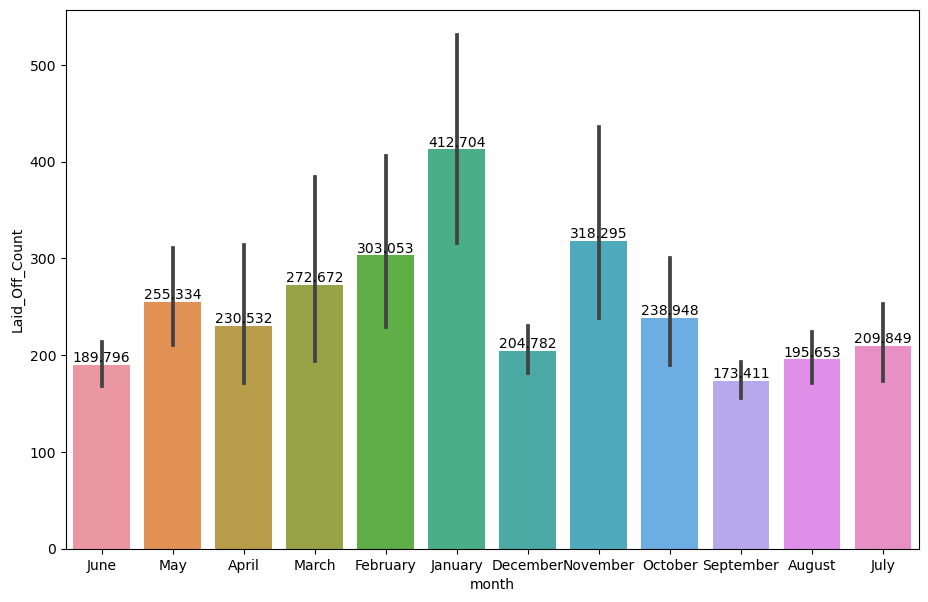

In [17]:
plt.figure(figsize=(11,7))
ax=sns.barplot(x="month",y="Laid_Off_Count",data=df,)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
plt.show()

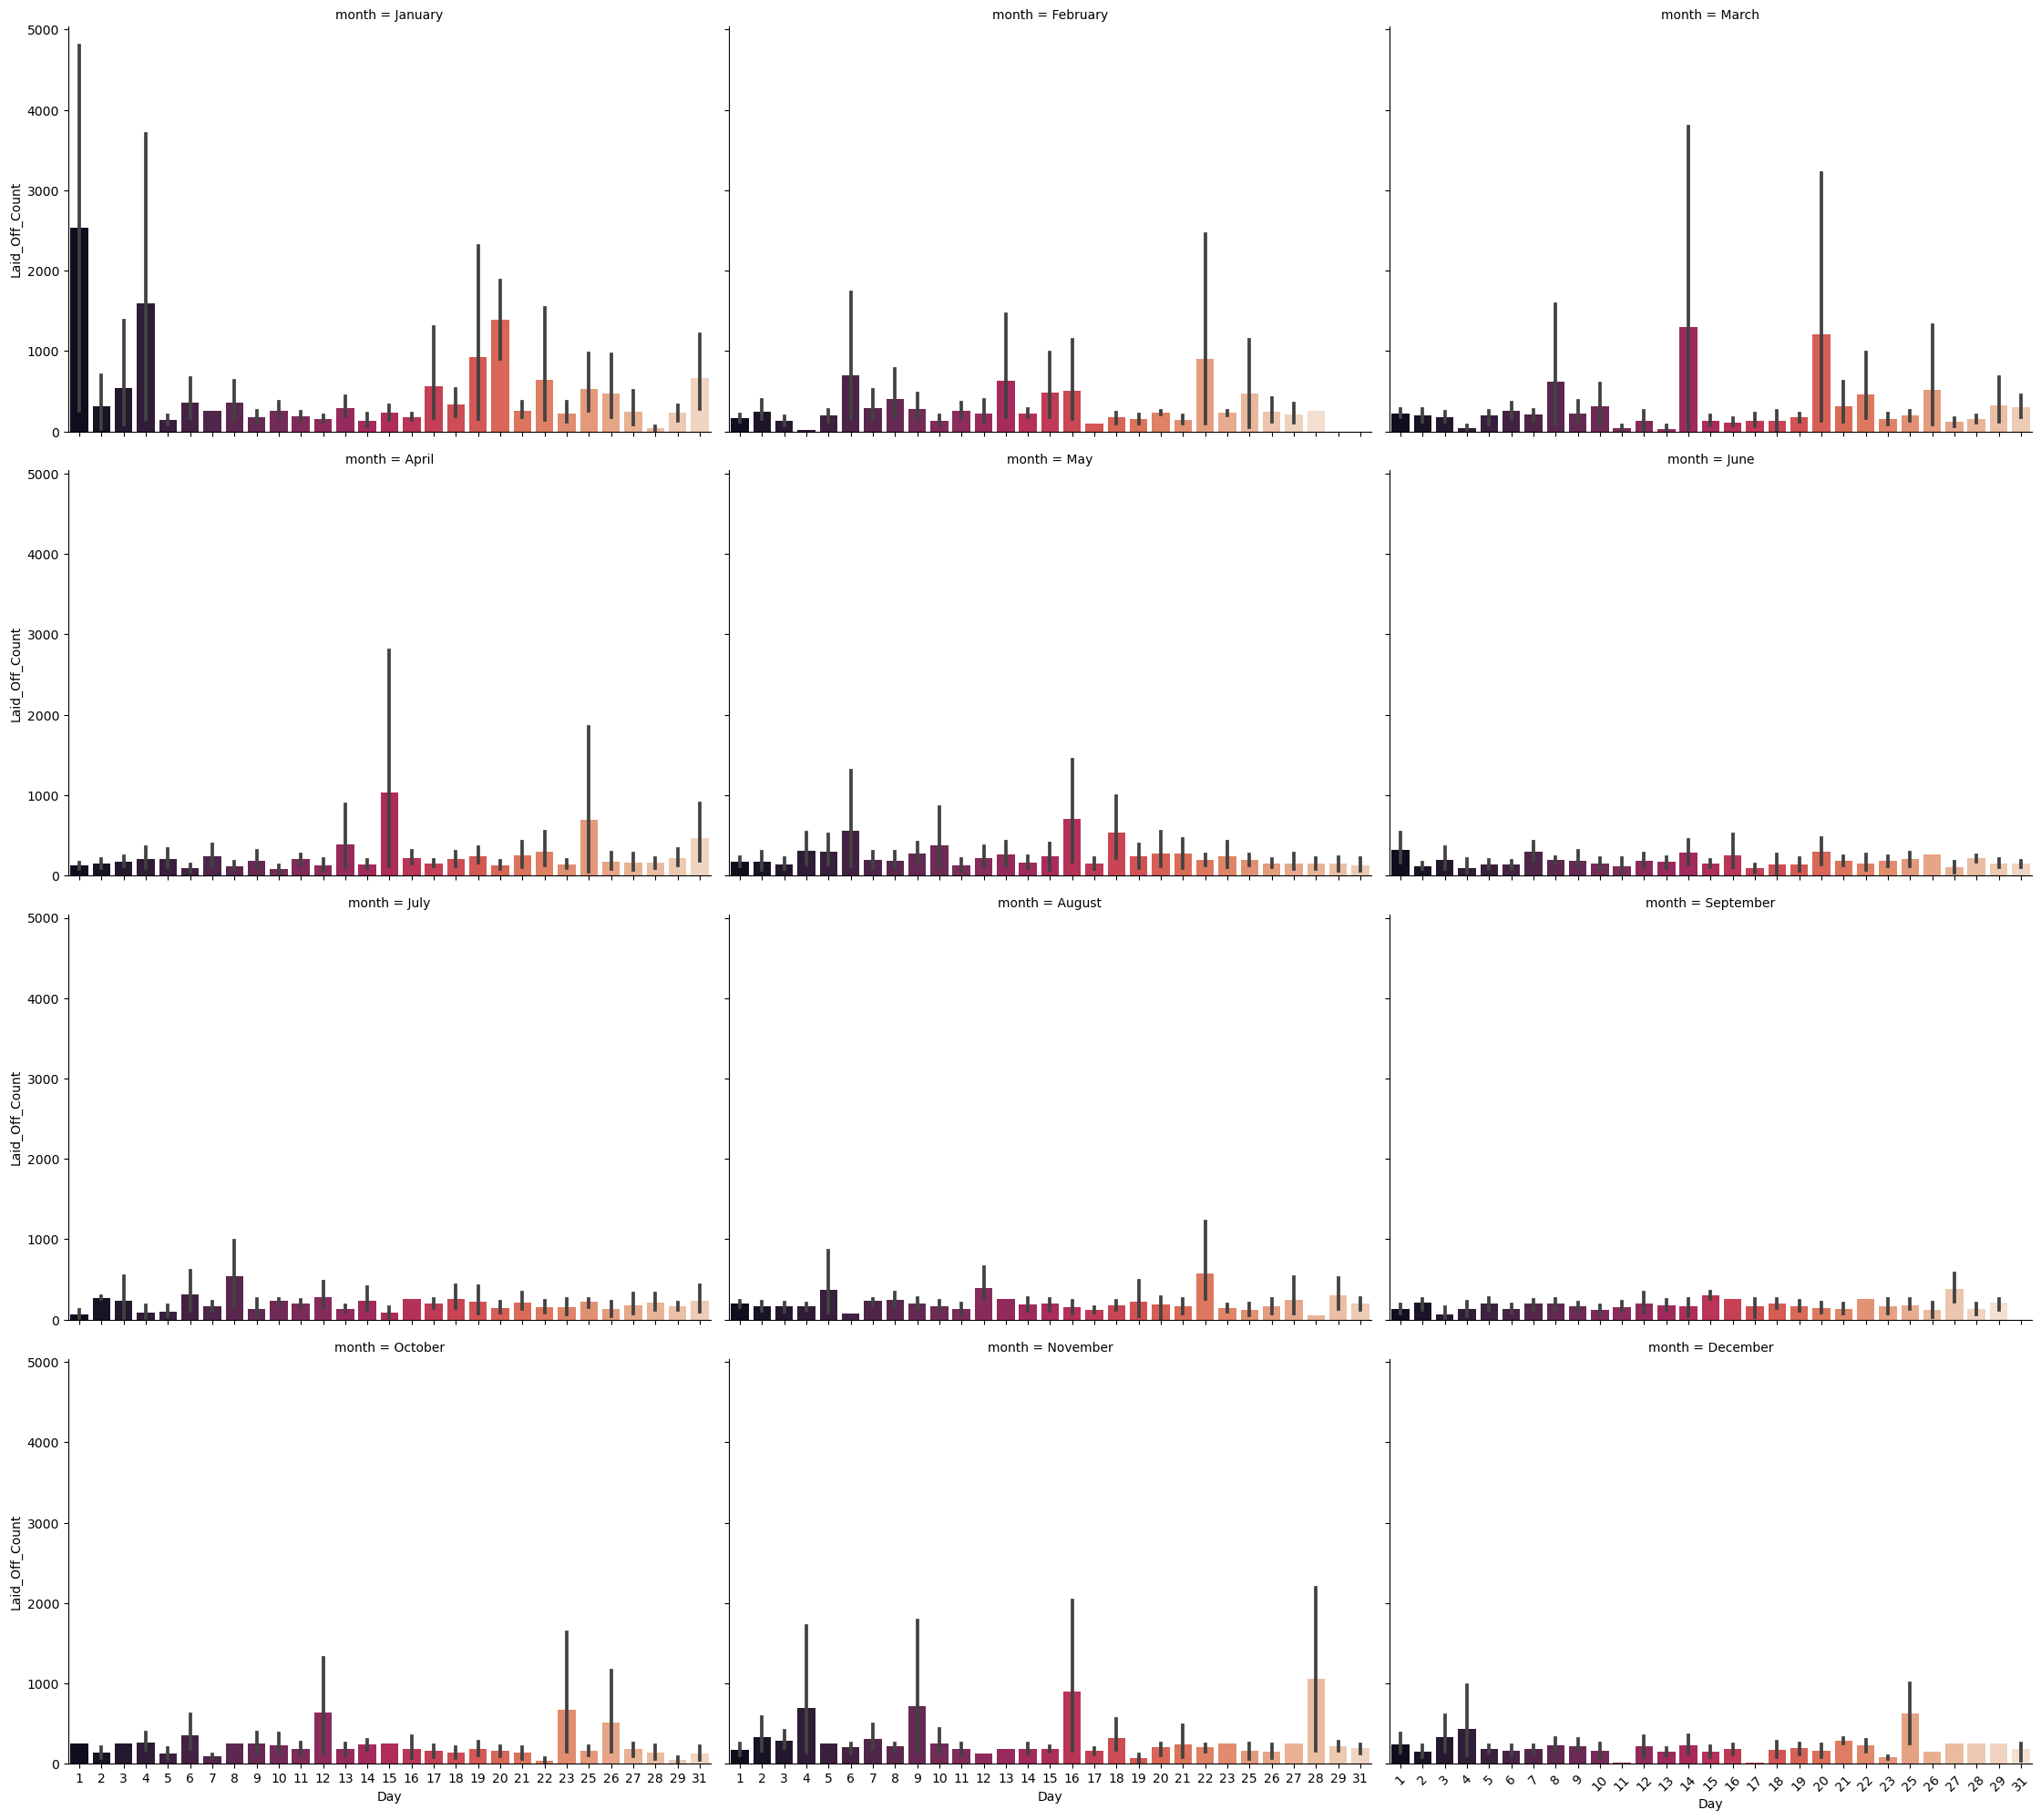

In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

df = df.sort_values("month")

g = sns.FacetGrid(df, col="month", col_wrap=3, height=5, aspect=1.5)

g.map_dataframe(sns.barplot, x="Day", y="Laid_Off_Count", palette="rocket")

plt.xticks(rotation=45)  
plt.show()

In [19]:
com_count1 = df.groupby("Company")['Laid_Off_Count']
top_com1 = com_count1.sum().sort_values(ascending=False).head(10)
top_com2=top_com1.reset_index()
print(top_com2)

      Company  Laid_Off_Count
0      Amazon    28871.705316
1        Meta    21515.852658
2      Google    14761.631645
3       Tesla    14757.926329
4   Microsoft    14573.852658
5        Dell    12907.926329
6         SAP    11000.000000
7  Salesforce    10840.000000
8     Philips    10000.000000
9       Cisco     8700.000000


In [20]:
com_count1 = df.groupby("Company")['Laid_Off_Count'].sum().reset_index().head(10)
com_count1

,Company,Laid_Off_Count
0,E Inc.,257.926329
1,F-Secure,70.000000
2,Included Health,257.926329
3,#Paid,19.000000
4,&Open,9.000000
5,100 Thieves,269.926329
6,10X Genomics,100.000000
7,123Milhas,257.926329
8,1K Kirana,600.000000
9,1stdibs,70.000000


In [21]:
df_company=df.groupby("Company")["Laid_Off_Count"].sum().reset_index()
df_company


,Company,Laid_Off_Count
0,E Inc.,257.926329
1,F-Secure,70.000000
2,Included Health,257.926329
3,#Paid,19.000000
4,&Open,9.000000
...,...,...
2591,kununu,257.926329
2592,mPharma,150.000000
2593,nCino,100.000000
2594,tZero,257.926329


In [22]:
com_count = df.groupby("Company")['Laid_Off_Count']
top_com = com_count.sum().sort_values(ascending=False).head()
top_com=top_com.reset_index()

print(top_com)

     Company  Laid_Off_Count
0     Amazon    28871.705316
1       Meta    21515.852658
2     Google    14761.631645
3      Tesla    14757.926329
4  Microsoft    14573.852658


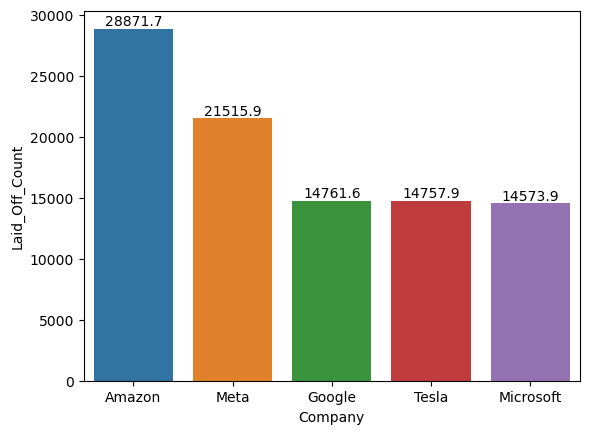

In [40]:
s=sns.barplot(data=top_com,x="Company",y="Laid_Off_Count")
for container in s.containers:
    s. bar_label(container,label_type="edge")
plt.show()

In [24]:
num_list1=[]
for col in df.columns:
    if df[col].nunique()>5:
        num_list1.append(col)
        
list2=list(set(df.columns)-set(num_list1))
        

In [25]:
print(num_list1)

['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Date', 'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country', 'Percentage', 'List_of_Employees_Laid_Off', 'StartDate', 'month', 'Day']


In [26]:
print(list2)

[]


In [27]:

top_company = df.groupby("Company")["Laid_Off_Count"].sum().nlargest(5).reset_index()
top_industry = df.groupby("Industry")["Laid_Off_Count"].sum().nlargest(5).reset_index()
top_country = df.groupby("Country")["Laid_Off_Count"].sum().nlargest(5).reset_index()

top_company


,Company,Laid_Off_Count
0,Amazon,28871.705316
1,Meta,21515.852658
2,Google,14761.631645
3,Tesla,14757.926329
4,Microsoft,14573.852658


In [28]:
top_industry

,Industry,Laid_Off_Count
0,Retail,94144.148598
1,Consumer,85987.769360
2,Finance,82049.875680
3,Other,81958.516953
4,Transportation,77729.769360


In [29]:
top_country

,Country,Laid_Off_Count
0,United States,635313.790289
1,India,64646.169108
2,United Kingdom,34212.874424
3,Germany,33059.084554
4,Netherlands,20508.410632


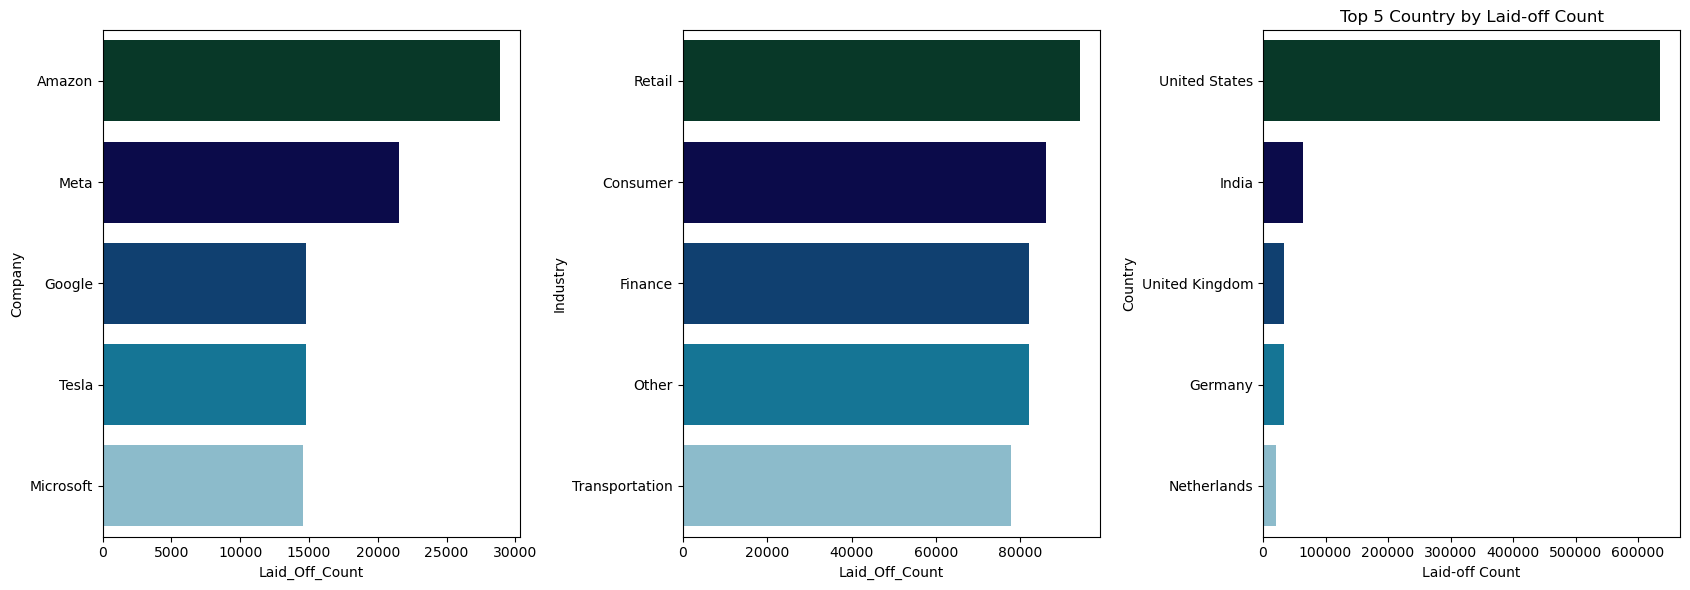

In [30]:
list3 = ["Company", "Industry", "Country"]

fig, axes = plt.subplots(nrows=1, ncols=len(list3), figsize=(17, 6))

for i, category in enumerate(list3):

    top=df.groupby(category)["Laid_Off_Count"].sum().nlargest(5).reset_index()

    sns.barplot(data=top,x="Laid_Off_Count",y=category,ax=axes[i],palette="ocean")


axes[i].set_title(f"Top 5 {category} by Laid-off Count")
axes[i].set_xlabel("Laid-off Count")
axes[i].set_ylabel(category)

plt.tight_layout()
plt.show()



In [31]:
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

## LayOff Data Correlation Heatmap

In [32]:
corr1 = df.select_dtypes(include=['number']).corr()
fig = px.imshow( corr1,  text_auto=".1f",color_continuous_scale="Viridis",title=" LayOff Data Correlation Heatmap",
    width=800,
    height=600
)
fig.show()